In [413]:
import pandas as pd
df = pd.read_csv('reg_hw.txt', delimiter=';')
df

,math,philosophy,english,hist_ec,micro
0,7,8,7,7,8
1,8,8,8,8,7
2,9,7,7,8,8
3,5,7,6,6,6
4,10,8,6,6,5
...,...,...,...,...,...
115,5,8,5,4,7
116,8,7,7,7,6
117,7,8,6,7,7
118,6,9,5,6,5


In [415]:
df_a = df[0:25]
df_b = df[25:60]
df_c = df[60:95]
df_d = df[95:]
df_a['group'] = 'A'
df_b['group'] = 'B'
df_c['group'] = 'C'
df_d['group'] = 'D'
pdlist = [df_a, df_b, df_c, df_d]
new_df = pd.concat(pdlist)


/var/folders/mn/w8y7qrc94fj3v9x9ny9klcz40000gn/T/ipykernel_47938/161536776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['group'] = 'A'
/var/folders/mn/w8y7qrc94fj3v9x9ny9klcz40000gn/T/ipykernel_47938/161536776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['group'] = 'B'
/var/folders/mn/w8y7qrc94fj3v9x9ny9klcz40000gn/T/ipykernel_47938/161536776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [455]:
new_df.groupby('group')['math'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,25.0,7.800000,1.500000,4.0,7.0,8.0,9.0,10.0
B,35.0,7.228571,1.238731,5.0,6.0,7.0,8.0,9.0
C,35.0,7.600000,1.062738,5.0,7.0,8.0,8.0,9.0
D,25.0,6.920000,0.759386,5.0,7.0,7.0,7.0,8.0


В описательных статистиках по группам можно отметить примерно равное среднее в первых трёх группах и заметно меньшее
среднее в группе D. Также можно отметить последовательное уменьшение стандартного отклонения от группы к группе - в 
группе A наибольшее, в группе D наименьшее. В группе A встречается как наименьшее значение 4, так и наибольшее 10.
В остальных же группах они одинаковые (4 и 9 соответстсвенно), исключая 8 в группе D. Значения медиан довольно сильно 
отличаются от средних (кроме группы D), но это связано с тем, что значения оценок целые. Типичное значение первого 
квартиля - 7, с исключением 6 в группе B. Значение третьего квартиля уменьшается от 9 в группе A до 7 в группе D.

<Axes: >

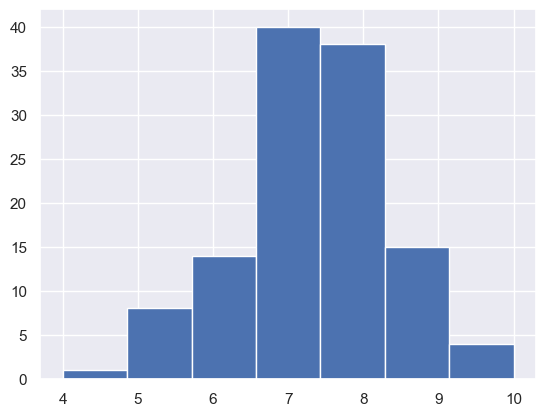

In [459]:
new_df['math'].hist(bins=7) #для расчёта кол-ва интервалов было использовано правило Стёрджеса, по нему вышло 7.9
#при 8 интервалах в данных был пробел, поэтому остановился на 7

В целом распределение стремится к нормальному - явно прорисовывается силуэт колокольчика, при этом распредление 
всё-таки скошено влево (потому что хвост слева). Также можно обратить внимание на ярко выраженный пик.

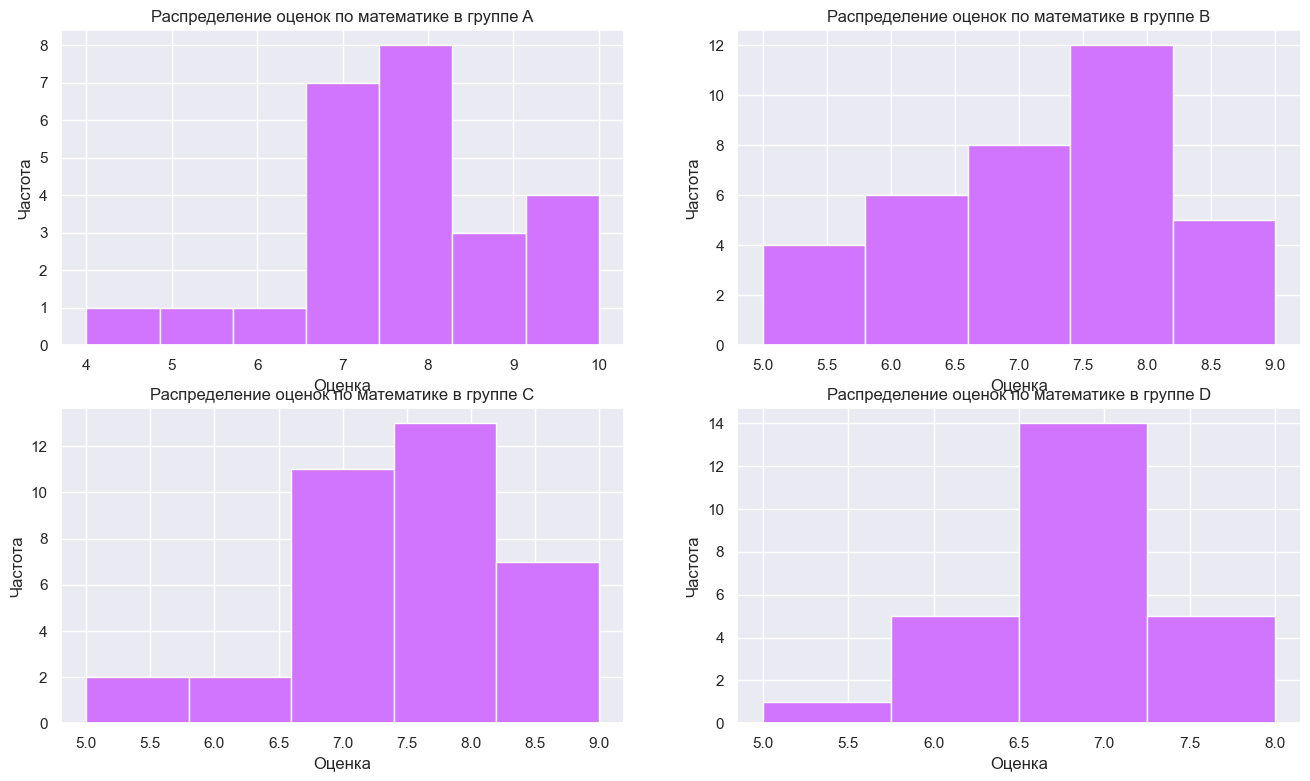

In [463]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 9));

axes[0, 0].hist(df_a['math'], color = "#D175FF", bins = 7);
axes[0, 0].set_xlabel('Оценка');
axes[0, 0].set_ylabel('Частота');
axes[0, 0].title.set_text('Распределение оценок по математике в группе A')

axes[0, 1].hist(df_b['math'], color = "#D175FF", bins=5);
axes[0, 1].set_xlabel('Оценка');
axes[0, 1].set_ylabel('Частота');
axes[0, 1].title.set_text('Распределение оценок по математике в группе B')

axes[1, 0].hist(df_c['math'], color = "#D175FF", bins = 5);
axes[1, 0].set_xlabel('Оценка');
axes[1, 0].set_ylabel('Частота');
axes[1, 0].title.set_text('Распределение оценок по математике в группе C')

axes[1, 1].hist(df_d['math'], color = "#D175FF", bins=4);
axes[1, 1].set_xlabel('Оценка');
axes[1, 1].set_ylabel('Частота');
axes[1, 1].title.set_text('Распределение оценок по математике в группе D')

Здесь были построены четыре графика - по каждой из групп. Во всех четырёх группах сохраняется тренд скошенности 
распределения влево. Группа A отличительная ярковыраженным пиком около середины и очень малым количеством значений 
у низких оценок. Группа B чем-то напоминает распределение хи-квадрата с 3 степенями свободы, но обращено в противоположную
сторону. Группа C напоминает группу A очень малым количеством значений у низких оценок. В группе D наблюдается
распределение наиболее похожее на нормальное среди групп - есть ярковыраженный пик по середине и равные между собой
хвосты, мешает буквально одно наблюдение слева.

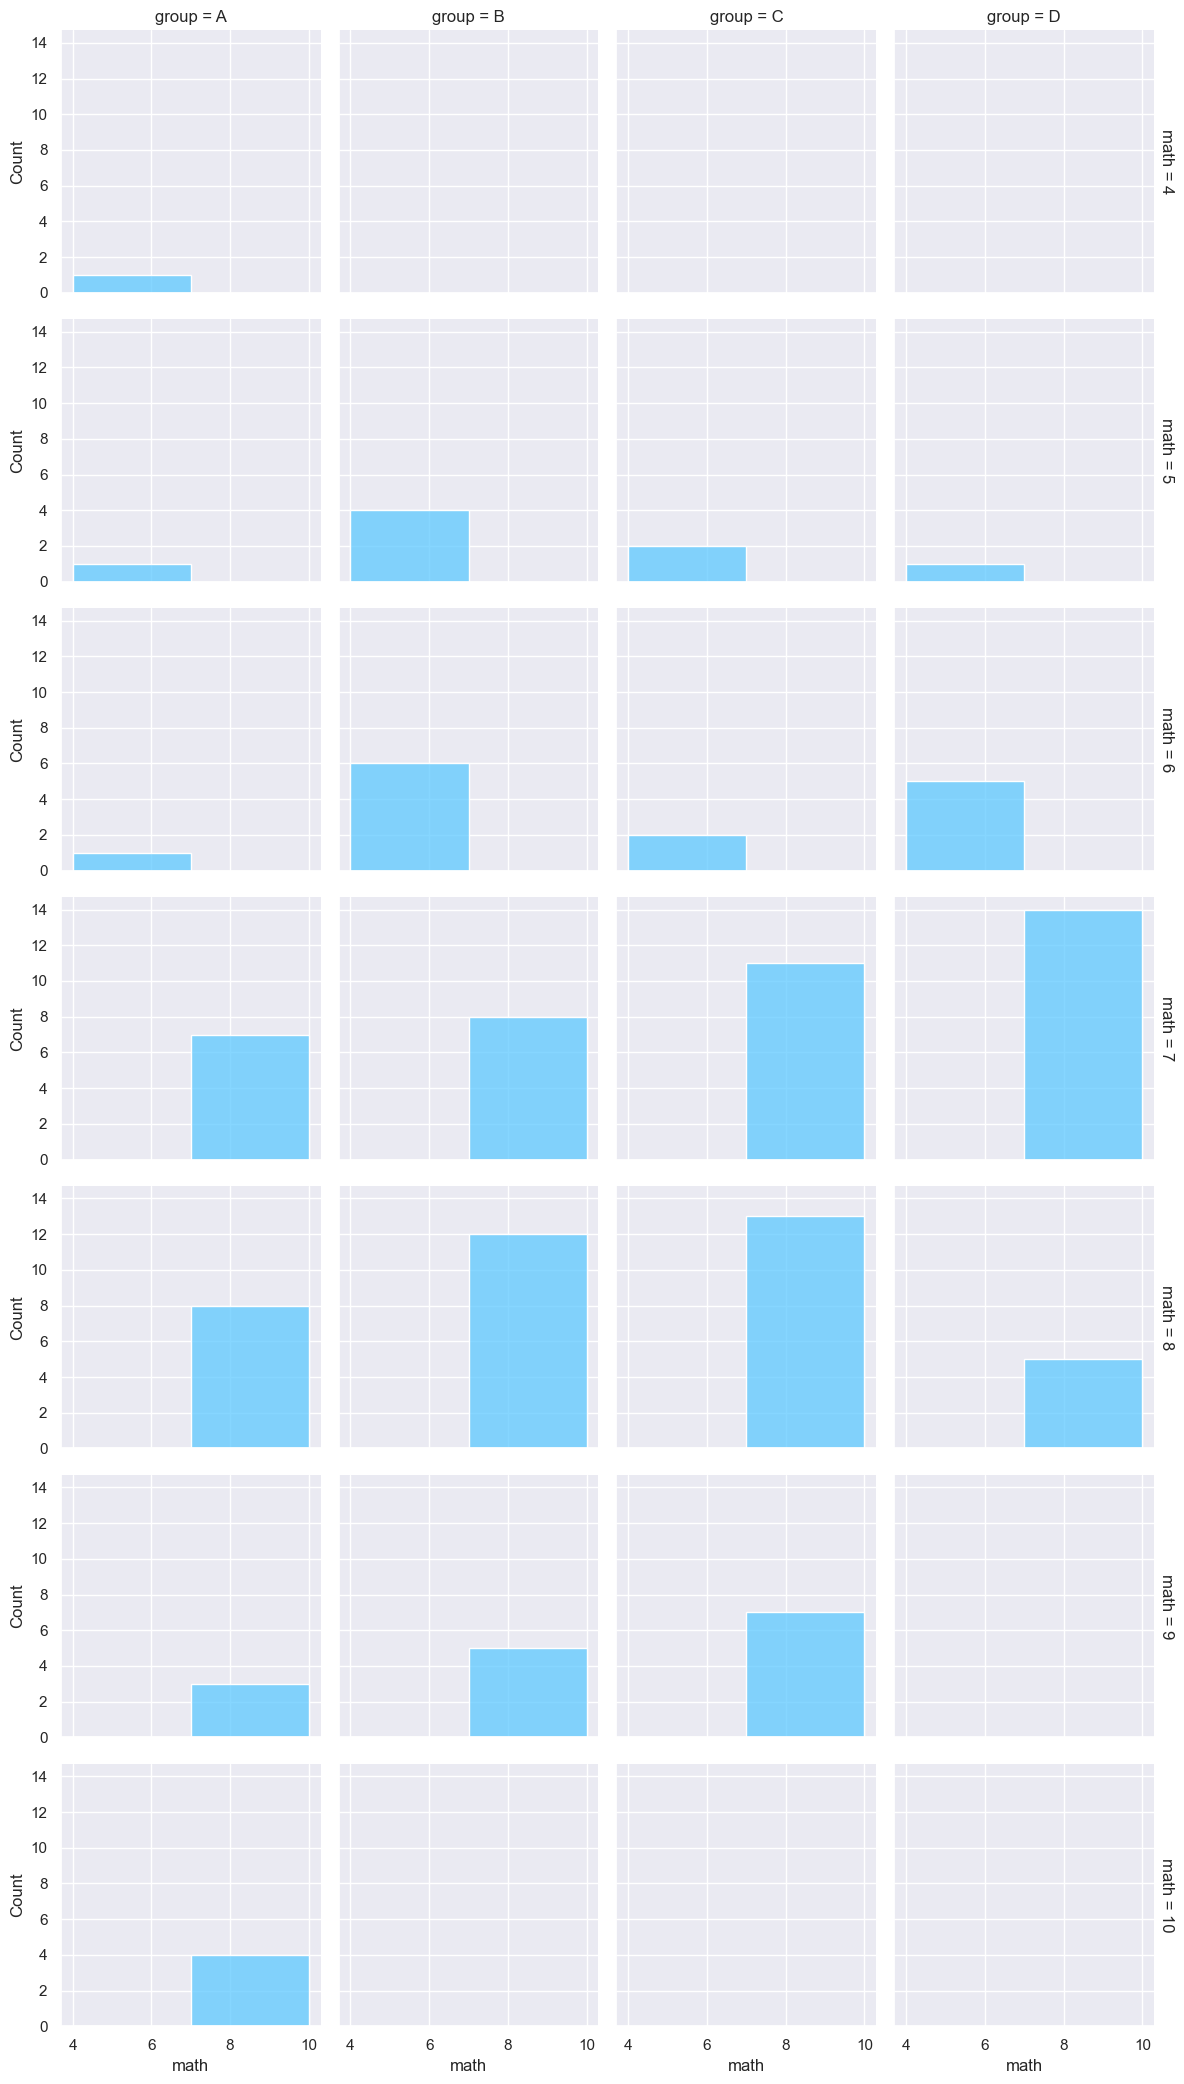

In [466]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    new_df, x="math", col="group", row="math",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), color = '#5EC9FF'
)

На данном графике я хотел более подробно изобразить распределение оценок по группам и конкретным значениям оценок (это
возможно благодаря отсутствию оценок с долями). Данный график представляет из себя нечтно похожее на таблицу сопряжения,
которую мы бы использовали в задачах по хи-квадрату. Такая таблица позволяет нам узнать конкретные значения наблюдений 
в каждой из групп с двумя определяющими характеристиками (группой и оценкой). Мы можем видеть, что в группе A есть 
единственная оценка 4, а также единственные оценки 10 (мы могли увидеть максимально значение 10 по функции .describe(), 
но мы не могли сказать сколько именно таких значений). Так, мы можем увидеть, что оценки в группе A сильнее «размазаны»,
чем в других группах. Так же можно увидеть что самое частое значение - оценка 7 в группе D (14 наблюдений), за ним 
следует оценка 8 в группе C (13 наблюдений). Можно долго рассматривать и описывать эту таблицу, но не стану, чтоб не
перегружать текстом.

In [471]:
import scipy.stats as stats
spisok = [df_a['math'], df_b['math'], df_c['math'], df_d['math']]
for i in spisok:
    print(stats.shapiro(i))

ShapiroResult(statistic=0.9196508281546651, pvalue=0.05030408397308137)
ShapiroResult(statistic=0.9019654975995306, pvalue=0.004467583631231732)
ShapiroResult(statistic=0.8812847407554103, pvalue=0.001288805974250836)
ShapiroResult(statistic=0.8379561785448886, pvalue=0.0010492778925822908)


Перед проведением АНОВЫ, мы должны убедиться в нормальности распределения в групп. Для этого были проведены тесты Шапиро, показавшие, что в группах B-D пи велью очень маленькое, нулевая гипотеза о нормальности распределения отвергается. Только в первой группе мы можем говорить о пограничном значении пи велью. Поскольку распределение в выборках ненормальное, прийдется работать с подобным допущением - это и является ограничением.

In [425]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('math ~ group', data=new_df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
group,3.0,12.180238,4.060079,2.973076,0.034643
Residual,116.0,158.411429,1.365616,NaN,NaN


Наша нулевая гипотеза при проведении АНОВЫ состоит в том, что средние групп равны. Ф-статистика строится по формуле mean_sq(group)/mean_sq(residual), где mean_sq(group) это 12.180238/3, а mean_sq(residual) 158.411429/116. mean_sq(group) - это межгрупповая дисперсия, а mean_sq(residual) внутригрупповая. Своими словами, ф-статистика показывает насколько дисперсия между группами больше дисперсии внутри групп и является ли эта разница значимой. Нулевая гипотеза о равенстве средних отвергается, потому что p-value (0.03) < уровня значимости (0.05). Таким образом, с уверенностью 95% мы можем говорить о том, что средние групп не равны.